In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [5]:
# Преобразование столбца "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

In [6]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [10]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index(name='Количество_продаж')

Вывести несколько первых строк сгруппированных данных

In [11]:
grouped_df.head()

,Дата,Количество_продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

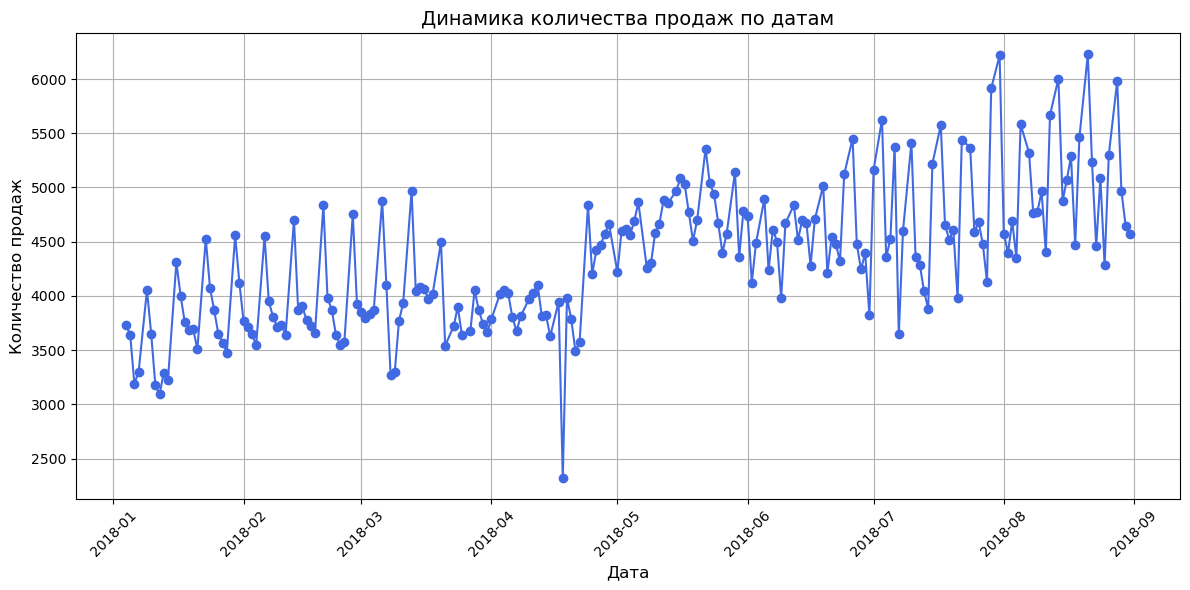

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'], marker='o', linestyle='-', color='royalblue')

plt.title('Динамика количества продаж по датам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Сохраняем в JPG
plt.savefig('sales_by_date.jpg', format='jpg', dpi=300)

# Показываем график
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

#### На графике представлена динамика количества продаж по датам за период с начала января по конец августа 2018 года.
#### Максимум: более 1800 продаж в день — в начале января и в августе.
#### Минимум: ниже 1200 продаж — резкое одиночное падение в середине весны.
#### Продажи носят цикличный и сезонный характер. Весной наблюдается спад, летом — рост.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [13]:
# Рассчитываем IQR (межквартильный размах)
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Условие выброса: значение за пределами [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

In [14]:
# Найдём строку с максимальным выбросом:
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [15]:
# Фильтрация по дню недели (среда = 2), по месяцам и складу
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  # июнь, июль, август
    (df['Дата'].dt.weekday == 2) &           # среда (понедельник = 0)
    (df['Склад'] == 3)                       # склад 3
]

In [16]:
# Группировка по товару и подсчёт суммы количества
top_product = (
    filtered_df
    .groupby('Номенклатура')['Количество']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print(top_product)

Номенклатура
product_1    2267
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [18]:
!pip install xlrd

In [19]:
# Загрузка и очистка погодных данных

# Загрузка Excel-файла
weather_df = pd.read_excel("weather.xls")

# Преобразуем дату
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

# Группировка по дню и средняя температура
weather_daily = (
    weather_df
    .groupby(weather_df['Дата'].dt.date)['T']
    .mean()
    .reset_index()
    .rename(columns={'Дата': 'Дата', 'T': 'T'})
)

# Преобразуем дату обратно в datetime64
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'])

In [20]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])

In [21]:
merged_df = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')

In [23]:
print(merged_df.columns)

Index(['Дата', 'Количество_продаж', 'T'], dtype='object')


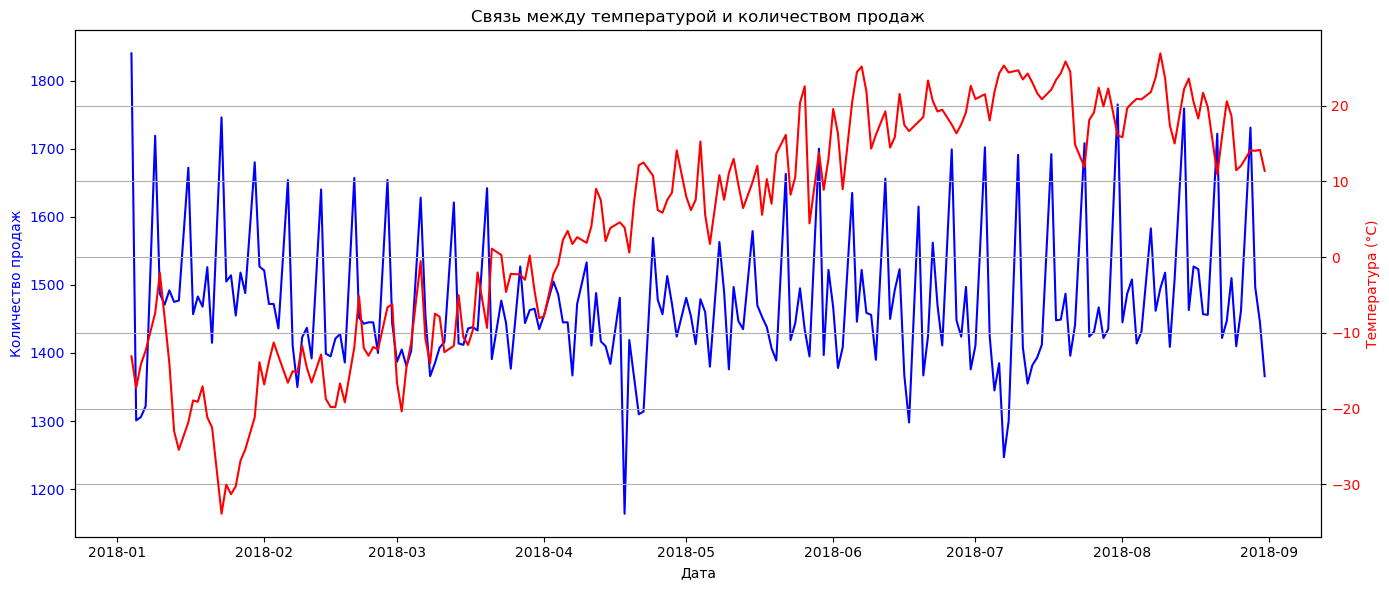

In [24]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Синяя линия — количество продаж
ax1.plot(merged_df['Дата'], merged_df['Количество_продаж'], label='Продажи', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Красная линия — температура
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], label='Температура (°C)', color='red')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Связь между температурой и количеством продаж')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
correlation = merged_df['Количество_продаж'].corr(merged_df['T'])
print(f"Коэффициент корреляции: {correlation:.3f}")

Коэффициент корреляции: -0.023


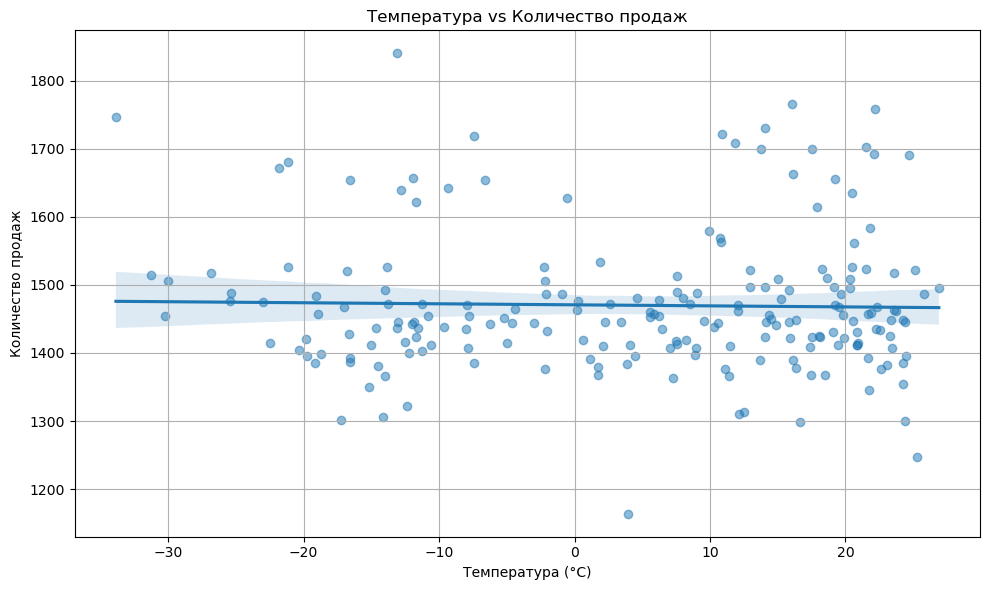

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='T', y='Количество_продаж', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Температура vs Количество продаж')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.tight_layout()
plt.show()

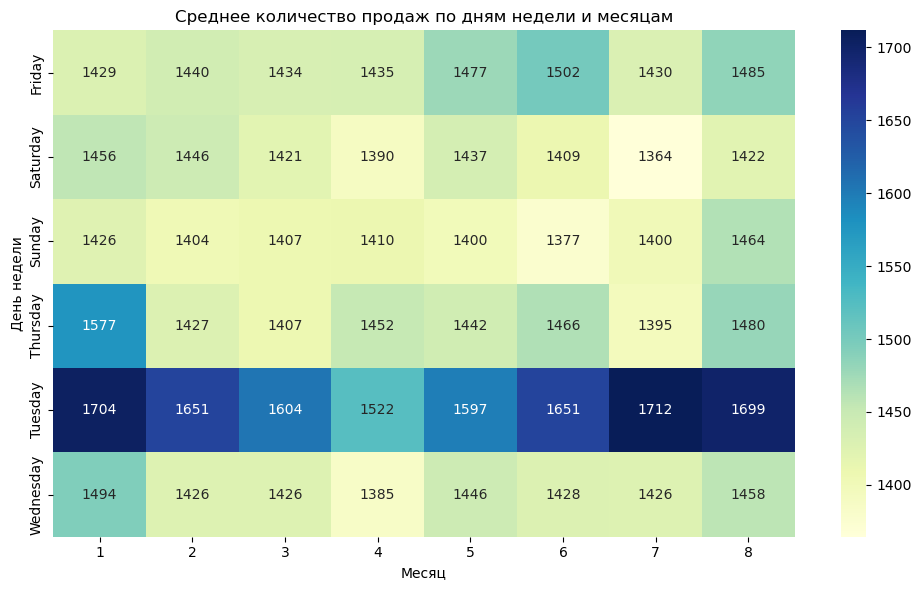

In [27]:
# Добавим колонки с месяцем и днем недели
merged_df['Месяц'] = merged_df['Дата'].dt.month
merged_df['День_недели'] = merged_df['Дата'].dt.day_name()

# Сводная таблица
heatmap_data = merged_df.pivot_table(
    index='День_недели',
    columns='Месяц',
    values='Количество_продаж',
    aggfunc='mean'
)

# Построим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Среднее количество продаж по дням недели и месяцам')
plt.ylabel('День недели')
plt.xlabel('Месяц')
plt.tight_layout()
plt.show()